# Descriptive Statistic

# Central Tendency

In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

%matplotlib inline
import seaborn as sns

In [5]:
x_ = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x_)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [16]:
y, y_with_nan = np.array(x_), np.array(x_with_nan)
z, z_with_nan = pd.Series(x_), pd.Series(x_with_nan)

print(y)
print(y_with_nan)
print(z)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [137]:
type(y)

numpy.ndarray

In [186]:
type(x_)

list

# 1. Mean 

In [109]:
# hitung central tendency dari data 

In [187]:
# cara manual
mean_ = sum(x_)/len(x_)
mean_

8.7

In [188]:
# pake built ini function
mean_= statistics.mean(x_)
mean_

8.7

In [148]:
# INGAT!
# Sebelumnya kita bisa menggunakan sebuah fungsi pada list
# namun, pada array, kita bisa menggunakan method
mean_= y.mean()
mean_

8.7

In [149]:
# tes ke list data yang ada nan
mean_= statistics.mean(x_with_nan)
mean_
# akan menghasilkan nan juga

nan

In [150]:
# solusi pertama
# gunakan method nanmean untuk ngeskip nilai NaN
np.nanmean(x_with_nan)

8.7

In [113]:
# solusi kedua
# ubah ke dalam bentuk data series dulu, lalu gunakan method z
mean_ = z.mean()
mean_

8.7

# a. Geometric Mean

In [174]:
# geometric mean is good at comparison between two things which has different properties
x = np.random.randint(1, 10, 10)
x

array([4, 9, 5, 8, 2, 7, 2, 3, 5, 6])

In [177]:
# cara manual
gmean = 1
for xi in x:
    gmean *= xi
    
gmean = gmean**(1/len(x))
print(gmean)

4.528728688116765


In [179]:
# cara dengan scipy
gmean = scipy.stats.gmean(x)
gmean

4.5287286881167645

In [176]:
print(4**2)

16


# b. Harmonic Mean

In [181]:
# harmonic good at handling data contains outlier
# cara manual
hmean = len(x)/sum(1/xi for xi in x)
hmean

3.95418170406402

In [182]:
# pakai scipy
hmean = scipy.stats.hmean(x)
hmean

3.95418170406402

In [183]:
print("Mean: ", x.mean())
print("Geometric mean: ", gmean)
print("Harmonic mean: ", hmean)

Mean:  5.1
Geometric mean:  4.5287286881167645
Harmonic mean:  3.95418170406402


In [119]:
range = x.max() - x.min()
range

7

In [120]:
np.ptp(x)

7

In [121]:
q1 = np.quantile(x, 0.25)
q3 = np.quantile(x, 0.75)

print("IQR: ", q3-q1)

IQR:  2.75


In [122]:
np.quantile(x, 0.975) - np.quantile(x, 0.025)

6.550000000000001

# 2. Median

In [190]:
# x_ = [8.0, 1, 2.5, 4, 28.0]
# cara manual
# untuk data ganjil
n = len(x_)
if n%2:
    median_ = sorted(x_)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x_), round(0.5*n)
    median_ = 0.5 * (x_ord[index-1]+x_ord[index])
    
median_

4

In [198]:
# atau dengan rumus scipy
statistics.median(x_)

4

In [196]:
# x_ = [8.0, 1, 2.5, 4]
# cara manual
# untuk data genap
n = len(x_[:-1])
if n%2:
    median_ = sorted(x_[:-1])[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x_[:-1]), round(0.5*n)
    median_ = 0.5 * (x_ord[index-1]+x_ord[index])
    
median_

3.25

In [197]:
# atau dengan rumus scipy
statistics.median(x_[:-1])

3.25

In [199]:
# untuk data genap
statistics.median_low(x_[:-1])

2.5

In [200]:
statistics.median_high(x_[:-1])

4

In [201]:
# untuk data Nan
# x_with_nan = [ 8.   1.   2.5  nan  4.  28]
statistics.median(x_with_nan)

6.0

In [202]:
# dengan rumus numpy
median_ = np.median(x_)
median_

4.0

# 3. Mode

In [203]:
# cara manual
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [206]:
# cara statmode
mode_ = statistics.mode(u)
mode_


2

In [208]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [211]:
# print modus dengan jumlah kemunculannya
# contoh untuk v
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [219]:
# method mode dapat secara otomatis mengabaikan nan secara defaultnya
new = pd.Series([23, 4, 11, math.nan, 11])
hasil = new.mode()

print(hasil)
print(hasil.count)


0    11.0
dtype: float64
<bound method Series.count of 0    11.0
dtype: float64>


# Spread

# 1. Variance
Mengukur seberapa jauh jarak antar satu data dengan rata-ratanya

In [53]:
# cara menghitung sample variance
n = len(x_)
mean_ = sum(x_)/n
# atau
# mean_ = statistics.mean(x_)
# mean_

# Hitung variasinya
# 1. cara manual
var_ = sum((xi - mean_)**2 for xi in x_)/(n-1) 
# 2. atau cara statistics
# var_ = statistics.variance(x_)
# 3. atau cara numpy 
# var_ = np.var(x_, ddof=1)
# 4. atau cara ini (harus bentuk ndarray)
# var_ = y.var(ddof=1)

# print hasil
print("Rata-rata: ", mean_)
print("Varians: ", var_)



Rata-rata:  8.7
Varians:  123.19999999999999


In [51]:
# cara menghitung population variance
# 1. cara manual
var_p = sum((xi - mean_)**2 for xi in x_)/(n) 
var_p
# 2. cara statistics
# statistics.pvariance(x_)
# 3. cara numpy
# np.var(x_, ddof=0)
# 4. cara ndarray
# var_p = y.var(ddof=0)
# var_p

98.55999999999999

# 2. Standard Deviation
Sama seperti varians, hanya saja lebih optimal karena nilainya sama dengan data point

In [82]:
# cara menghitung sample std
# 1. cara manual
std = var_ ** 0.5
std
# 2. cara statistics
# statistics.stdev(x_)
# 3. cara numpy
# np.std(x_, ddof=1)
# 4. cara ndarray
# y.std(ddof=1)

11.099549540409285

In [81]:
# cara menghitung population std
# 1. cara manual
std_p = var_p ** 0.5
std_p
# 2. cara statistics
# statistics.pstdev(x_)
# 3. cara numpy
# np.std(x_, ddof=0)
# 4. cara ndarray
# y.std(ddof=0)

9.927738916792684

# 2. Skew
Mengukur asimetri sampel data

In [83]:
# menghitung sample skewness
skew = (sum((xi - mean_)**3 for xi in x_)*n / ((n-1)*(n-2)*std**3))
skew

1.9470432273905929

Hasil diatas menunujukkan angka +, artinya kita punya right-side tail

In [85]:
# 1. cara statistics
scipy.stats.skew(x_, bias=False)
# bias = False -> mengaktifkan koreksi bias statistik
# tapi cara statistics ini tidak cocok untuk data yg nan

1.9470432273905927

In [91]:
# solusinya
# ubah data nan tdi ke series gunakan method .skew()
z_with_nan.skew()

1.9470432273905924

In [89]:
type(z_with_nan)

pandas.core.series.Series

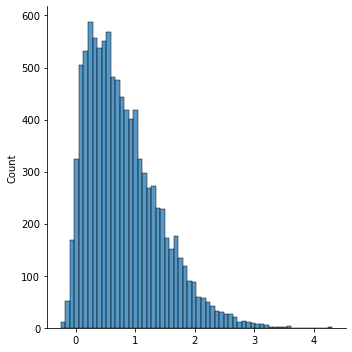

In [130]:
x1 = scipy.stats.skewnorm.rvs(a=10, size=10000, loc=0)
sns.displot(x1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4520\2534787247.py:1: RuntimeWarning: invalid value encountered in sqrt
  sns.displot(x1**0.5)


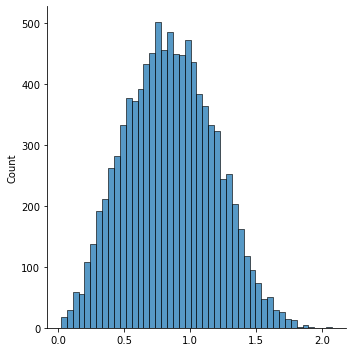

In [131]:
sns.displot(x1**0.5)

In [ ]:
# 3. Percentils

In [ ]:
# 4. Range

# 3. Kurtosis
1. Mesokurtic(0)
2. Platykurtic(-)
3. Leptokurtic(+)

In [132]:
scipy.stats.kurtosis(x)


-1.295451067724136

In [133]:
result = scipy.stats.describe(x, ddof=1, bias=False)
result

DescribeResult(nobs=100, minmax=(0.002981076668044924, 0.9926234781679959), mean=0.5182873332527046, variance=0.0946698907945594, skewness=-0.07681209523700433, kurtosis=-1.3001488771484995)

In [134]:
pd.Series(x).describe()

count    100.000000
mean       0.518287
std        0.307685
min        0.002981
25%        0.206973
50%        0.532953
75%        0.821581
max        0.992623
dtype: float64

# 4. Correlation